## <center>CSE 546: Reinforcement Learning</center>
### <center>Prof. Alina Vereshchaka</center>
<!-- ### <center>Fall 2022</center> -->

In [1]:
# Imports
from environment import WumpusWorldEnvironment

# Environment

We will be working with an implementation of the Wumpus World environment. The environment comes from the book "Artificial Intelligence: A Modern Approach" by Stuart J. Russell and Peter Norvig. 

### ENVIRONMENT DETAILS:

The environment is a 6 x 6 grid world containing a total of 36 grid blocks. 

#### ENVIRONMENT OBJECTS:
The environment consists of the following objects:

1. **Agent** - The agent starts in the grid block at the bottom left corner whose co-ordinates are [0, 0]. The goal of our agent is to collect the Gold while avoiding the Wumpus and the pits. 

2. **Wumpus** - The monster which would eat the agent if they are in the same grid block.

3. **Pit** - The agent must avoid falling into the pits. 

4. **Gold** - The agent must collect the Gold.

5. **Breeze** - Breeze surrounds the Pits and warn the agent of a Pit in an adjacent grid block.

6. **Stench** - Stench surrounds the Wumpus and warns the agent of the Wumpus in an adjacent grid block.

#### ENVIRONMENT OBSERVATIONS:

Our implementation of the environment provides you with four different types of observations:

1. **Integer** - Integer in the range [0 - 35]. This represents the grid block the agent is in. E.g., if the agent is in the bottom left grid block (starting position) the observation would be 0, if the agent is in the grid block containing the Gold the observation would be 34, if the agent is in the top right grid block the observation would be 35.

2. **Vector** - 

    **2.1.** A vector of length 2 representing the agent co-ordinates. The first entry represents the x co-ordinate and the second entry represets the y co-ordinate. E.g., if the agent is in the bottom left grid block (starting position) the observation would be [0, 0], if the agent is in the grid block containing the Gold the observation would be [4, 5], if the agent is in the top right grid block the observation would be [5, 5].
    
    **2.2.** A vector of length 36 representing the one-hot encoding of the integer observation (refer type 1 above). E.g., if the agent is in the bottom left grid block (starting position) the observation would be [1, 0, ..., 0, 0], if the agent is in the grid block containing the Gold the observation would be [0, 0, ..., 1, 0], if the agent is in the top right grid block the observation would be [0, 0, ..., 0, 1].


3. **Image** - Image render of the environment returned as an NumPy array. The image size is 84 * 84 (same size used in the DQN paper). E.g., if the agent is in the bottom right grid block the observation is:

    Observation: (84 * 84)

     [[255 255 255 ... 255 255 255]

     [255 255 255 ... 255 255 255]

     [255 255 255 ... 255 255 255]

     ...

     [255 255 255 ... 255 255 255]

     [255 255 255 ... 255 255 255]

     [255 255 255 ... 255 255 255]]

    Observation type: <class 'numpy.ndarray'>

    Observation Shape: (84, 84)

    Visually, it looks like:
    <img src="./images/environment_render.png" width="500" height="500">
    

4. **Float** - Float in the range [0 - $\infty$] representing the time elapsed in seconds. 

#### ENVIRONMENT ACTIONS:

Our implementation of the environment provides you with three different types of actions:

1. **Discrete** - Integer in the range [0 - 3] representing the four actions possible in the environment as follows: 0 - Right 1 - Left 2 - Up 3 - Down.

2. **Multi-Discrete** - Array of length four where each element takes binary values 0 or 1. Array elements represent if we take a particular action. Array element with index 0 corresponds to the right action, index 1 corresponds to the left action, index 2 corresponds to the up action, and index 3 corresponds to the down action. E.g., 
   action = [1, 0, 0, 0] would result in the agent moving right.
   action = [1, 0, 1, 0] would result in the agent moving right and up.
   action = [0, 1, 0, 1] would result in the agent moving left and down.

3. **Continuous** - Float in the range [-1, 1] determining whether the agent will go left, right, up, or down as follows:

    if -1 <= action <= -0.5:
        Go Right.
    elif -0.5 < action <= 0:
        Go Left.
    elif 0 < action <= 0.5:
        Go Up.
    elif 0.5 < action <= 1:
        Go Down.
        
### YOUR TASK IS TO USE A NEURAL NETWORK TO WORK WITH ALL FOUR TYPES OF OBSERVATIONS AND ALL THREE TYPES OF  ACTIONS.
### Note: You don't have to train your agent/neural network. You just have to build the neural network structure that takes the observation as input and produces the desired output with the initial weights.

#### You can use libraries such as PyTorch/TensorFlow/Keras to build your neural networks.

#### <span style="color:red">You cannot use RL libraries that already provide the neural network to you such as Stable-baselines3, Keras-RL, TF agents, Ray RLLib etc.</span>

<img src="./images/wumpus_world_environment.jpg" width="600" height="600">

Starting training...
Episode 1/1000, Total Reward: -103, Epsilon: 0.9950
Episode 2/1000, Total Reward: -116, Epsilon: 0.9900
Episode 3/1000, Total Reward: -108, Epsilon: 0.9851
Episode 4/1000, Total Reward: -110, Epsilon: 0.9801
Episode 5/1000, Total Reward: -103, Epsilon: 0.9752
Episode 6/1000, Total Reward: -119, Epsilon: 0.9704
Episode 7/1000, Total Reward: -121, Epsilon: 0.9655
Episode 8/1000, Total Reward: -109, Epsilon: 0.9607
Episode 9/1000, Total Reward: -108, Epsilon: 0.9559
Episode 10/1000, Total Reward: -116, Epsilon: 0.9511
Episode 11/1000, Total Reward: -108, Epsilon: 0.9464
Episode 12/1000, Total Reward: -103, Epsilon: 0.9416
Episode 13/1000, Total Reward: -107, Epsilon: 0.9369
Episode 14/1000, Total Reward: -101, Epsilon: 0.9322
Episode 15/1000, Total Reward: -102, Epsilon: 0.9276
Episode 16/1000, Total Reward: -105, Epsilon: 0.9229
Episode 17/1000, Total Reward: -104, Epsilon: 0.9183
Episode 18/1000, Total Reward: -113, Epsilon: 0.9137
Episode 19/1000, Total Reward: -12

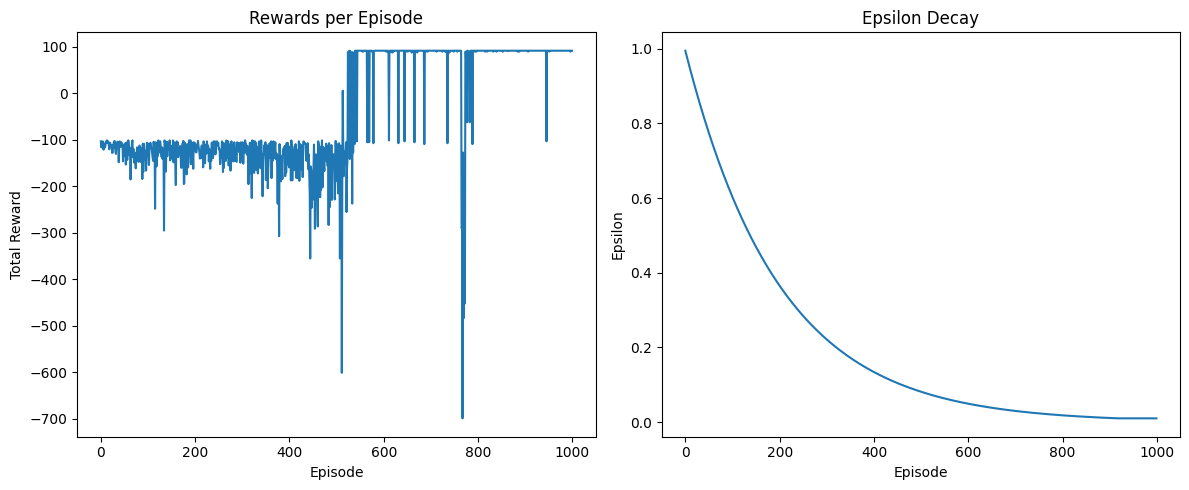


Testing trained model for 5 episodes:
Test Episode 1, Total Reward: 92
Test Episode 2, Total Reward: 92
Test Episode 3, Total Reward: 92
Test Episode 4, Total Reward: 92
Test Episode 5, Total Reward: 92

Running 1 episode with rendering:
Steps taken by the agent:
Step 1: Action=2, Agent Position=[0 0]
Step 2: Action=0, Agent Position=[0 1]
Step 3: Action=0, Agent Position=[1 1]
Step 4: Action=0, Agent Position=[2 1]
Step 5: Action=2, Agent Position=[3 1]
Step 6: Action=0, Agent Position=[3 2]
Step 7: Action=2, Agent Position=[4 2]
Step 8: Action=2, Agent Position=[4 3]
Step 9: Action=2, Agent Position=[4 4]
Step 10: Final Frame, Agent Position=[4 5]

Displaying frames from the episode:


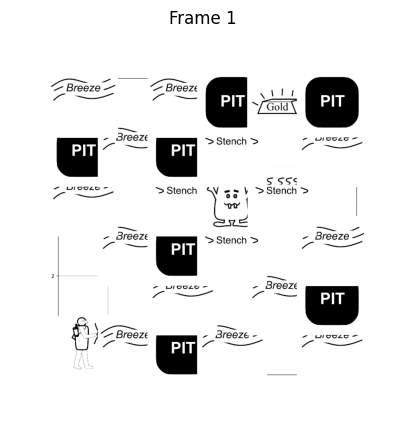

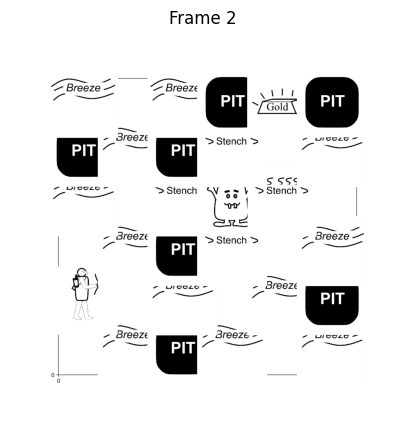

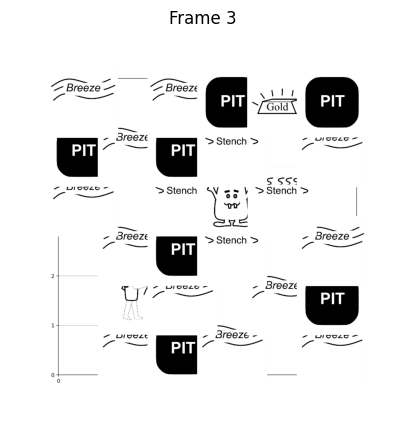

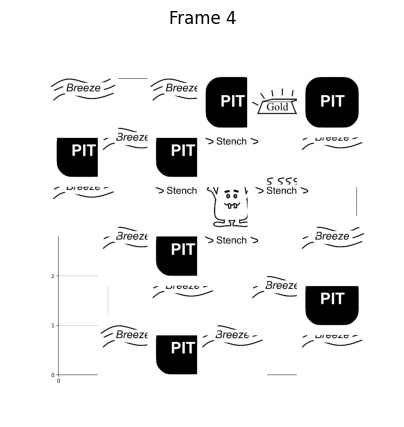

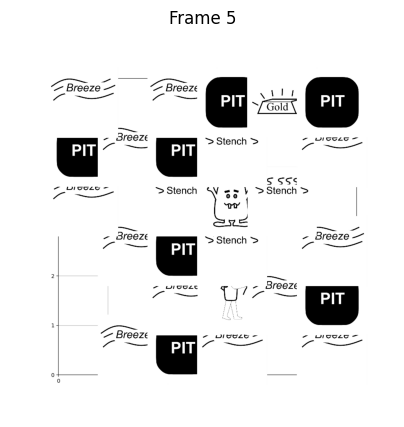

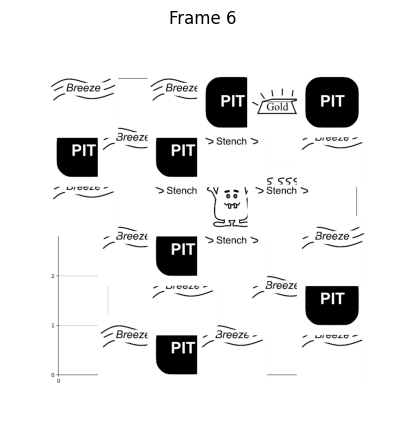

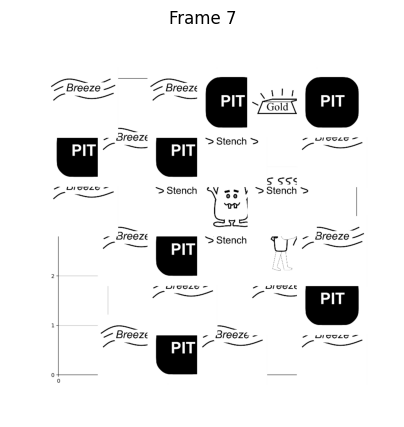

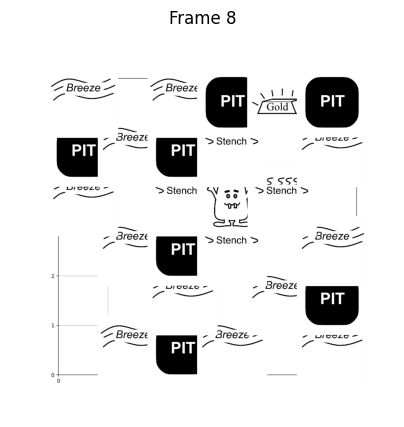

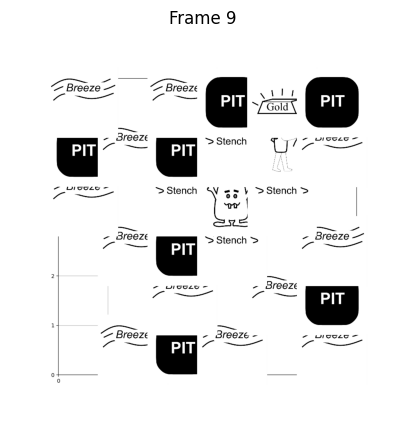

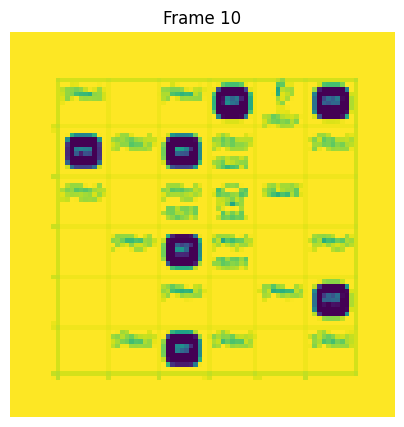

In [ ]:
import cv2
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from environment import WumpusWorldEnvironment
import numpy as np
from time import time
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from collections import deque
import random

# ### Q-Network Definition
class QNetwork(nn.Module):
    def __init__(self):
        """Initialize the Q-Network with 36 input states and 4 output actions."""
        super(QNetwork, self).__init__()
        self.fc1 = nn.Linear(36, 64)  # Input: one-hot encoded state (size 36)
        self.fc2 = nn.Linear(64, 4)   # Output: Q-values for 4 actions
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Utility Function
def state_to_onehot(state):
    """Convert integer state to one-hot encoded tensor."""
    onehot = np.zeros(36)
    onehot[state] = 1
    return torch.tensor(onehot, dtype=torch.float32).unsqueeze(0)


gamma = 0.99               
epsilon_start = 1.0        
epsilon_end = 0.01          
epsilon_decay = 0.995       
batch_size = 64            
replay_buffer_size = 10000  
target_update_freq = 100    
learning_rate = 0.001       
num_episodes = 1000         

env = WumpusWorldEnvironment(observation_type='integer', action_type='discrete')
q_network = QNetwork()
target_network = QNetwork()
target_network.load_state_dict(q_network.state_dict())
optimizer = optim.Adam(q_network.parameters(), lr=learning_rate)
replay_buffer = deque(maxlen=replay_buffer_size)


episode_rewards = []
epsilons = []
epsilon = epsilon_start
total_steps = 0

print("Starting training...")
for episode in range(num_episodes):
    state, _ = env.reset()
    state = state_to_onehot(state)
    total_reward = 0
    done = False
    
    while not done:
        if random.random() < epsilon:
            action = env.action_space.sample()
        else:
            with torch.no_grad():
                q_values = q_network(state)
                action = torch.argmax(q_values).item()
        
    
        next_state, reward, terminated, truncated, _ = env.step(action)
        next_state = state_to_onehot(next_state)
        total_reward += reward
        done = terminated or truncated
        
        
        replay_buffer.append((state, action, reward, next_state, terminated))
        
        # Train if enough experiences are available
        if len(replay_buffer) >= batch_size:
            transitions = random.sample(replay_buffer, batch_size)
            states, actions, rewards, next_states, terminations = zip(*transitions)
            states = torch.cat(states)
            actions = torch.tensor(actions)
            rewards = torch.tensor(rewards, dtype=torch.float32)
            next_states = torch.cat(next_states)
            terminations = torch.tensor(terminations, dtype=torch.float32)
            
            # Compute target Q-values
            with torch.no_grad():
                next_q_values = target_network(next_states).max(dim=1)[0]
                targets = rewards + gamma * next_q_values * (1 - terminations)
            
            # Compute current Q-values and loss
            current_q_values = q_network(states).gather(1, actions.unsqueeze(1)).squeeze(1)
            loss = F.mse_loss(current_q_values, targets)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        total_steps += 1
        if total_steps % target_update_freq == 0:
            target_network.load_state_dict(q_network.state_dict())
        
        state = next_state
    
    episode_rewards.append(total_reward)
    epsilon = max(epsilon_end, epsilon * epsilon_decay)
    epsilons.append(epsilon)
    print(f"Episode {episode + 1}/{num_episodes}, Total Reward: {total_reward}, Epsilon: {epsilon:.4f}")

torch.save(q_network.state_dict(), 'q_network.pth')
print("Model saved as 'q_network.pth'")

# ### Plot Rewards and Epsilon Decay
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(episode_rewards)
plt.title('Rewards per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')

plt.subplot(1, 2, 2)
plt.plot(epsilons)
plt.title('Epsilon Decay')
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.tight_layout()
plt.show()

# ### Test for 5 Episodes
print("\nTesting trained model for 5 episodes:")
q_network.load_state_dict(torch.load('q_network.pth'))
for i in range(5):
    state, _ = env.reset()
    state = state_to_onehot(state)
    total_reward = 0
    done = False
    while not done:
        with torch.no_grad():
            q_values = q_network(state)
            action = torch.argmax(q_values).item()
        state, reward, terminated, truncated, _ = env.step(action)
        state = state_to_onehot(state)
        total_reward += reward
        done = terminated or truncated
    print(f"Test Episode {i + 1}, Total Reward: {total_reward}")

# ### Run 1 Episode with Rendering and Log Steps
print("\nRunning 1 episode with rendering:")
images = []
state, _ = env.reset()
state = state_to_onehot(state)
done = False
step_count = 0

print("Steps taken by the agent:")
while not done:
     # Render the current frame
    img = env.render(plot=False)
    images.append(img)  # Add the frame to the images list
    
    with torch.no_grad():
        q_values = q_network(state)
        action = torch.argmax(q_values).item()  # Select the action
    
    print(f"Step {step_count + 1}: Action={action}, Agent Position={env.agent_pos}")
    
    # Take the action
    state, reward, terminated, truncated, _ = env.step(action)
    state = state_to_onehot(state)
    done = terminated or truncated
    
    # Increment the step counter
    step_count += 1

# Add the final frame after the loop ends
img = env.render(plot=False) 
images.append(img) 

# Log the final step
print(f"Step {step_count + 1}: Final Frame, Agent Position={env.agent_pos}")

# ### Display Frames
print("\nDisplaying frames from the episode:")
for i, img in enumerate(images):
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.title(f"Frame {i + 1}")
    plt.axis('off')
    plt.show(block=False)
    plt.pause(0.1)
    plt.close()


all the above images are showing step by step unitil it collect the gold from 4,5 position

Running 1 episode with rendering:

Steps taken by the agent:

Step 1: Action=2, Agent Position=[0 0]

Step 2: Action=0, Agent Position=[0 1]

Step 3: Action=0, Agent Position=[1 1]

Step 4: Action=0, Agent Position=[2 1]

Step 5: Action=2, Agent Position=[3 1]

Step 6: Action=0, Agent Position=[3 2]

Step 7: Action=2, Agent Position=[4 2]

Step 8: Action=2, Agent Position=[4 3]

Step 9: Action=2, Agent Position=[4 4]

Step 10: Final Frame, Agent Position=[4 5]

## Cartpole and LunarLander Env

Running CartPole-v1 environment...
Episode 100	Average Score: 18.66
Episode 200	Average Score: 13.94
Episode 300	Average Score: 15.78
Episode 400	Average Score: 33.47
Episode 500	Average Score: 142.93
Episode 600	Average Score: 173.14
Episode 700	Average Score: 142.70
Episode 800	Average Score: 136.90
Episode 900	Average Score: 124.90
Episode 1000	Average Score: 131.02
Episode 1100	Average Score: 133.51
Episode 1200	Average Score: 133.71
Episode 1300	Average Score: 144.97
Episode 1400	Average Score: 171.15
Episode 1500	Average Score: 163.64
Episode 1600	Average Score: 156.93
Episode 1700	Average Score: 151.54
Episode 1800	Average Score: 160.62
Episode 1900	Average Score: 195.68
Episode 2000	Average Score: 240.87
Episode 2100	Average Score: 257.14
Episode 2200	Average Score: 268.41
Episode 2300	Average Score: 271.64
Episode 2400	Average Score: 263.11
Episode 2500	Average Score: 255.67
Episode 2600	Average Score: 323.68
Episode 2700	Average Score: 396.17
Episode 2800	Average Score: 447.8

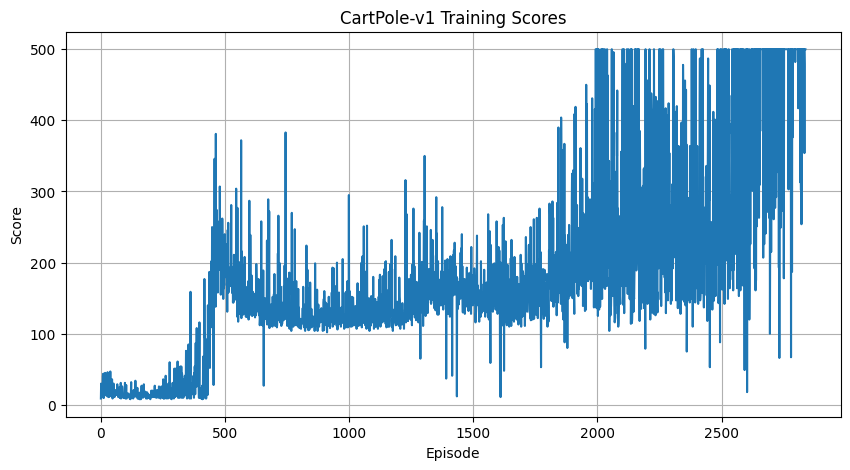

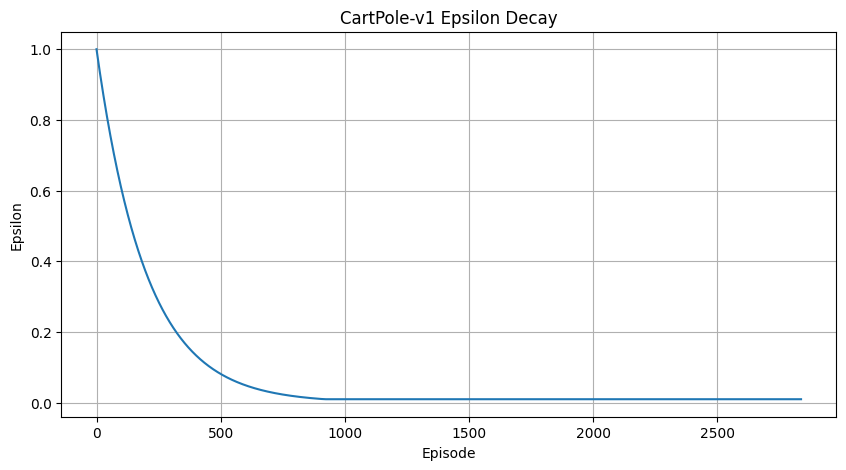


Evaluating CartPole-v1...
Episode 1	Score: 500.00
Episode 2	Score: 500.00
Episode 3	Score: 500.00
Episode 4	Score: 500.00
Episode 5	Score: 500.00


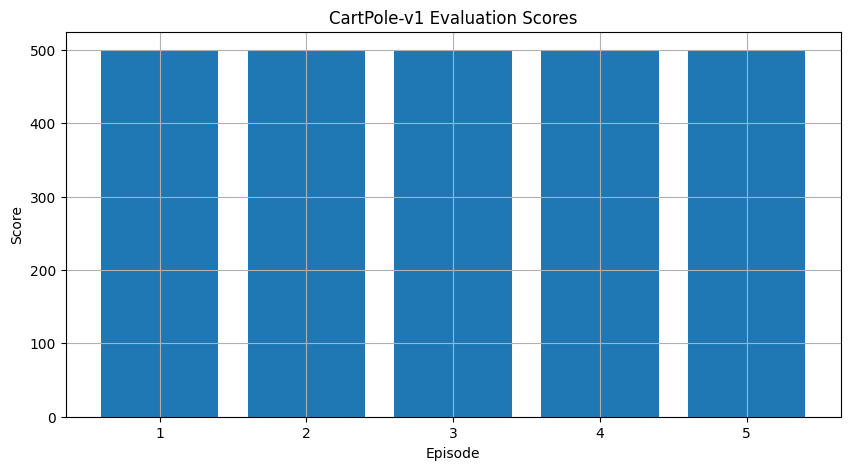


Running LunarLander-v3 environment...
Episode 100	Average Score: -153.11
Episode 200	Average Score: -82.995
Episode 300	Average Score: -50.50
Episode 400	Average Score: 79.478
Episode 500	Average Score: 164.41
Episode 600	Average Score: 157.86
Episode 700	Average Score: 174.28
Episode 800	Average Score: 193.41
Episode 900	Average Score: 213.01
Episode 1000	Average Score: 218.65
Episode 1100	Average Score: 226.24
Episode 1200	Average Score: 238.93
Episode 1300	Average Score: 249.77
Episode 1302	Average Score: 250.49
Saving the agent...


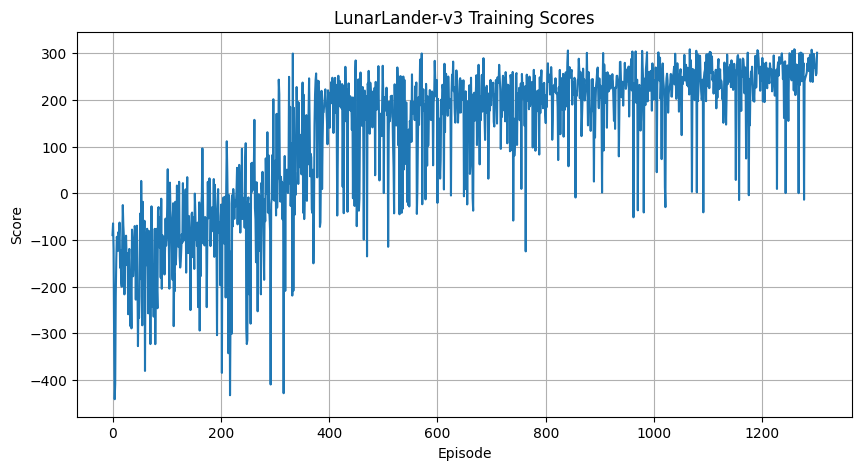

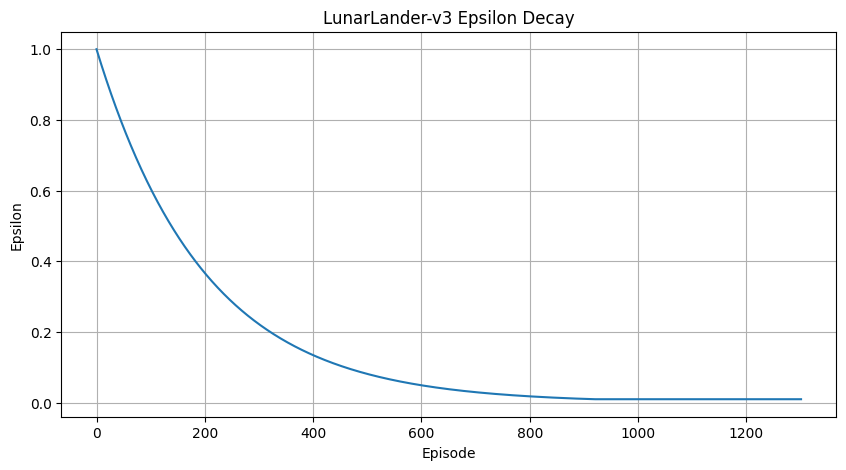


Evaluating LunarLander-v3...
Episode 1	Score: 301.96
Episode 2	Score: 239.27
Episode 3	Score: 238.90
Episode 4	Score: 300.99
Episode 5	Score: 255.82


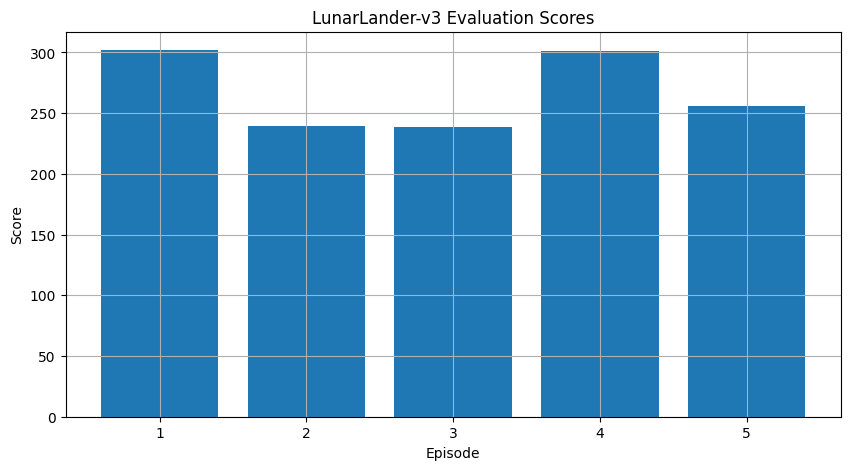

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import gymnasium as gym
from collections import deque, namedtuple
import random
import matplotlib.pyplot as plt
from typing import List, Tuple


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


Experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])

# Define the Q-network
class QNetwork(nn.Module):
    def __init__(self, state_size: int, action_size: int, seed: int = 42):
        super(QNetwork, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc1 = nn.Linear(state_size, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, action_size)
        
    def forward(self, state):
        x = torch.relu(self.fc1(state))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# Define the replay buffer
class ReplayBuffer:
    def __init__(self, buffer_size: int, batch_size: int, seed: int = 42):
        self.memory = deque(maxlen=buffer_size)
        self.batch_size = batch_size
        self.seed = random.seed(seed)
    
    def add(self, state, action, reward, next_state, done):
        e = Experience(state, action, reward, next_state, done)
        self.memory.append(e)
    
    def sample(self):
        experiences = random.sample(self.memory, k=self.batch_size)
        
        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).long().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([int(e.done) for e in experiences if e is not None])).float().to(device)
        
        return (states, actions, rewards, next_states, dones)
    
    def __len__(self):
        return len(self.memory)

# Define the DQN agent
class DQNAgent:
    def __init__(self, state_size: int, action_size: int, config: dict):
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(config['seed'])
        
        self.qnetwork_local = QNetwork(state_size, action_size, config['seed']).to(device)
        self.qnetwork_target = QNetwork(state_size, action_size, config['seed']).to(device)
        self.optimizer = optim.Adam(self.qnetwork_local.parameters(), lr=config['lr'])
        
        self.memory = ReplayBuffer(config['buffer_size'], config['batch_size'], config['seed'])
        
        self.t_step = 0
        
        self.gamma = config['gamma']
        self.tau = config['tau']
        self.update_every = config['update_every']
        self.batch_size = config['batch_size']
        
    def step(self, state, action, reward, next_state, done):
        self.memory.add(state, action, reward, next_state, done)
        
        # Learn every UPDATE_EVERY time steps
        self.t_step = (self.t_step + 1) % self.update_every
        if self.t_step == 0:
            if len(self.memory) > self.batch_size:
                experiences = self.memory.sample()
                self.learn(experiences)

    def act(self, state, eps: float = 0.):
        if isinstance(state, tuple):
            state = state[0]
        state = torch.from_numpy(state).float().unsqueeze(0).to(device)
        self.qnetwork_local.eval()
        with torch.no_grad():
            action_values = self.qnetwork_local(state)
        self.qnetwork_local.train()

  
        if random.random() > eps:
            return np.argmax(action_values.cpu().data.numpy())
        else:
            return random.choice(np.arange(self.action_size))
    
    def learn(self, experiences: Tuple):
        states, actions, rewards, next_states, dones = experiences
        

        Q_targets_next = self.qnetwork_target(next_states).detach().max(1)[0].unsqueeze(1)

        Q_targets = rewards + (self.gamma * Q_targets_next * (1 - dones))
        
        Q_expected = self.qnetwork_local(states).gather(1, actions)
        
        loss = nn.MSELoss()(Q_expected, Q_targets)
    
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        
        self.soft_update(self.qnetwork_local, self.qnetwork_target, self.tau)
    
    def soft_update(self, local_model, target_model, tau: float):
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau * local_param.data + (1.0 - tau) * target_param.data)

def train_dqn(env, agent: DQNAgent, n_episodes: int = 2000, max_t: int = 1000, eps_start: float = 1.0, 
              eps_end: float = 0.01, eps_decay: float = 0.995, solve_score: float = None):
    scores = []
    scores_window = deque(maxlen=100)
    eps_history = []
    eps = eps_start
    
    for i_episode in range(1, n_episodes + 1):
        state = env.reset()
        if isinstance(state, tuple):
            state = state[0]  # Handle tuple output from reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, truncated, info = env.step(action)  # Updated unpacking
            done = done or truncated 
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break
        
        scores_window.append(score)
        scores.append(score)
        eps_history.append(eps)
        eps = max(eps_end, eps_decay * eps)
        
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        
        # Save the agent at the end of training or when the environment is solved
        if i_episode == n_episodes or (solve_score is not None and np.mean(scores_window) >= solve_score):
            print('\nSaving the agent...')
            torch.save({
                'qnetwork_local': agent.qnetwork_local.state_dict(),
                'qnetwork_target': agent.qnetwork_target.state_dict(),
                'optimizer': agent.optimizer.state_dict(),
                'config': {
                    'gamma': agent.gamma,
                    'tau': agent.tau,
                    'update_every': agent.update_every,
                    'batch_size': agent.batch_size
                }
            }, f'{env.spec.id}_dqn_agent.pth') 
            break
    
    return scores, eps_history

def load_agent(file_path: str, state_size: int, action_size: int, config: dict) -> DQNAgent:
    checkpoint = torch.load(file_path)
    
    agent = DQNAgent(state_size, action_size, config)
    

    agent.qnetwork_local.load_state_dict(checkpoint['qnetwork_local'])
    agent.qnetwork_target.load_state_dict(checkpoint['qnetwork_target'])
    agent.optimizer.load_state_dict(checkpoint['optimizer'])
    
    return agent

def evaluate(env, file_path: str, state_size: int, action_size: int, config: dict, n_episodes: int = 5, max_t: int = 1000, render: bool = False):
    agent = load_agent(file_path, state_size, action_size, config)
    
    scores = []
    for i_episode in range(1, n_episodes + 1):
        state = env.reset()
        if isinstance(state, tuple):
            state = state[0]
        score = 0
        for t in range(max_t):
            if render:
                env.render()
            action = agent.act(state, eps=0)
            next_state, reward, done, truncated, info = env.step(action) 
            done = done or truncated  
            state = next_state
            score += reward
            if done:
                break
        scores.append(score)
        print(f'Episode {i_episode}\tScore: {score:.2f}')
    return scores

def plot_scores(scores: List[float], title: str = "Training Scores"):
    plt.figure(figsize=(10, 5))
    plt.plot(scores)
    plt.title(title)
    plt.xlabel('Episode')
    plt.ylabel('Score')
    plt.grid(True)
    plt.show()

def plot_epsilon_decay(eps_history: List[float], title: str = "Epsilon Decay"):
    plt.figure(figsize=(10, 5))
    plt.plot(eps_history)
    plt.title(title)
    plt.xlabel('Episode')
    plt.ylabel('Epsilon')
    plt.grid(True)
    plt.show()

def plot_evaluation(scores: List[float], title: str = "Evaluation Scores"):
    plt.figure(figsize=(10, 5))
    plt.bar(range(1, len(scores) + 1), scores)
    plt.title(title)
    plt.xlabel('Episode')
    plt.ylabel('Score')
    plt.xticks(range(1, len(scores) + 1))
    plt.grid(True)
    plt.show()

def run_cartpole():
    print("Running CartPole-v1 environment...")
    env = gym.make('CartPole-v1')
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n
    
    config = {
        'seed': 42,
        'lr': 0.001,
        'gamma': 0.99,
        'tau': 1e-3,
        'buffer_size': int(1e5),
        'batch_size': 64,
        'update_every': 4
    }
    
    agent = DQNAgent(state_size, action_size, config)
    

    scores, eps_history = train_dqn(env, agent, n_episodes=5000, solve_score=470)
    plot_scores(scores, "CartPole-v1 Training Scores")
    plot_epsilon_decay(eps_history, "CartPole-v1 Epsilon Decay")
    
    print("\nEvaluating CartPole-v1...")
    eval_scores = evaluate(env, 'CartPole-v1_dqn_agent.pth', state_size, action_size, config, n_episodes=5)
    plot_evaluation(eval_scores, "CartPole-v1 Evaluation Scores")
    
    env.close()

def run_lunar_lander():
    print("\nRunning LunarLander-v3 environment...")
    env = gym.make('LunarLander-v3') 
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n
    
    config = {
        'seed': 42,
        'lr': 0.0005,
        'gamma': 0.99,
        'tau': 1e-3,
        'buffer_size': int(1e5),
        'batch_size': 64,
        'update_every': 4
    }
    
    agent = DQNAgent(state_size, action_size, config)
    

    scores, eps_history = train_dqn(env, agent, n_episodes=3000, eps_decay=0.995, solve_score=250)
    plot_scores(scores, "LunarLander-v3 Training Scores")
    plot_epsilon_decay(eps_history, "LunarLander-v3 Epsilon Decay")
    

    print("\nEvaluating LunarLander-v3...")
    eval_scores = evaluate(env, 'LunarLander-v3_dqn_agent.pth', state_size, action_size, config, n_episodes=5, render=False)
    plot_evaluation(eval_scores, "LunarLander-v3 Evaluation Scores")
    
    env.close()

if __name__ == "__main__":
    run_cartpole()
    run_lunar_lander()